## Black Friday Dataset EDA And Feature Engineering
### Cleaning and preparing the data for model training

In [1]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing the dataset
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
##  import the test data
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
##Merge both train and test data
df=pd.concat([df_train,df_test], ignore_index=True)   ### union & union all
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
##Basic
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df.drop(['User_ID'],axis=1,inplace=True)

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)  ## encoding the gender column using one hot encoding
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [15]:
# ##second technqiue
# from sklearn import preprocessing

# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])

# df['Age'].unique()

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,7,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
##second technqiue
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['City_Category']= label_encoder.fit_transform(df['City_Category'])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,1,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,False,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,False,1,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,False,1,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,True,7,16,2,4+,0,8,NaN,NaN,7969.0


In [18]:
## Missing Values
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [19]:
## Replace the missing values with mode OR MAXIMUM OCCURING VALUE
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [20]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,False,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,False,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,False,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,True,7,16,2,4+,0,8,8.0,16.0,7969.0


In [22]:
df.shape

(783667, 11)

In [23]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [24]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,False,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,False,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,False,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,True,7,16,2,4,0,8,8.0,16.0,7969.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: bool(1), float64(3), int64(5), object(2)
memory usage: 60.5+ MB


In [27]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: bool(1), float64(3), int64(6), object(1)
memory usage: 60.5+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

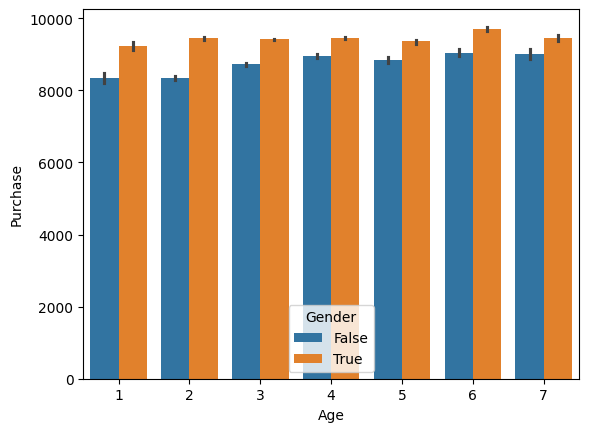

In [28]:
#Visualisation Age vs Purchased
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

## Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

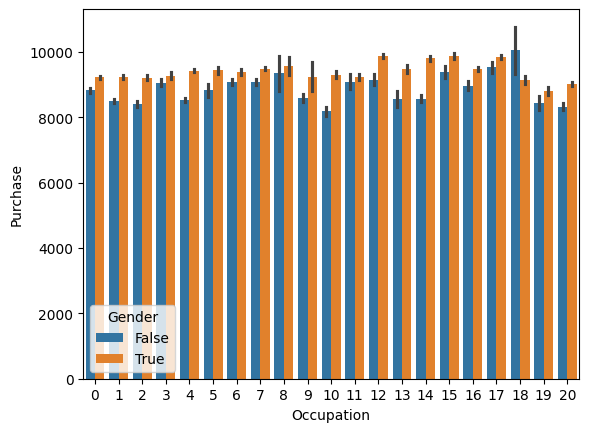

In [29]:
#Visualisation Age vs Purchased
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,False,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,False,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,False,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,True,7,16,2,4,0,8,8.0,16.0,7969.0


In [31]:
##Feature Scaling
df_test=df[df['Purchase'].isnull()]

In [32]:
df_train=df[~df['Purchase'].isnull()]

In [33]:
X=df_train.drop('Purchase',axis=1)

In [34]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,False,1,10,0,2,0,3,8.0,16.0
1,P00248942,False,1,10,0,2,0,1,6.0,14.0
2,P00087842,False,1,10,0,2,0,12,8.0,16.0
3,P00085442,False,1,10,0,2,0,12,14.0,16.0
4,P00285442,True,7,16,2,4,0,8,8.0,16.0


In [35]:
X.shape

(550068, 10)

In [36]:
y=df_train['Purchase']

In [37]:
y.shape

(550068,)

In [38]:
y

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0
...,...
550063,368.0
550064,371.0
550065,137.0
550066,365.0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [40]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [41]:
## feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [42]:
## train ur model

## **Handling Missing Values**

<Figure size 1000x500 with 0 Axes>

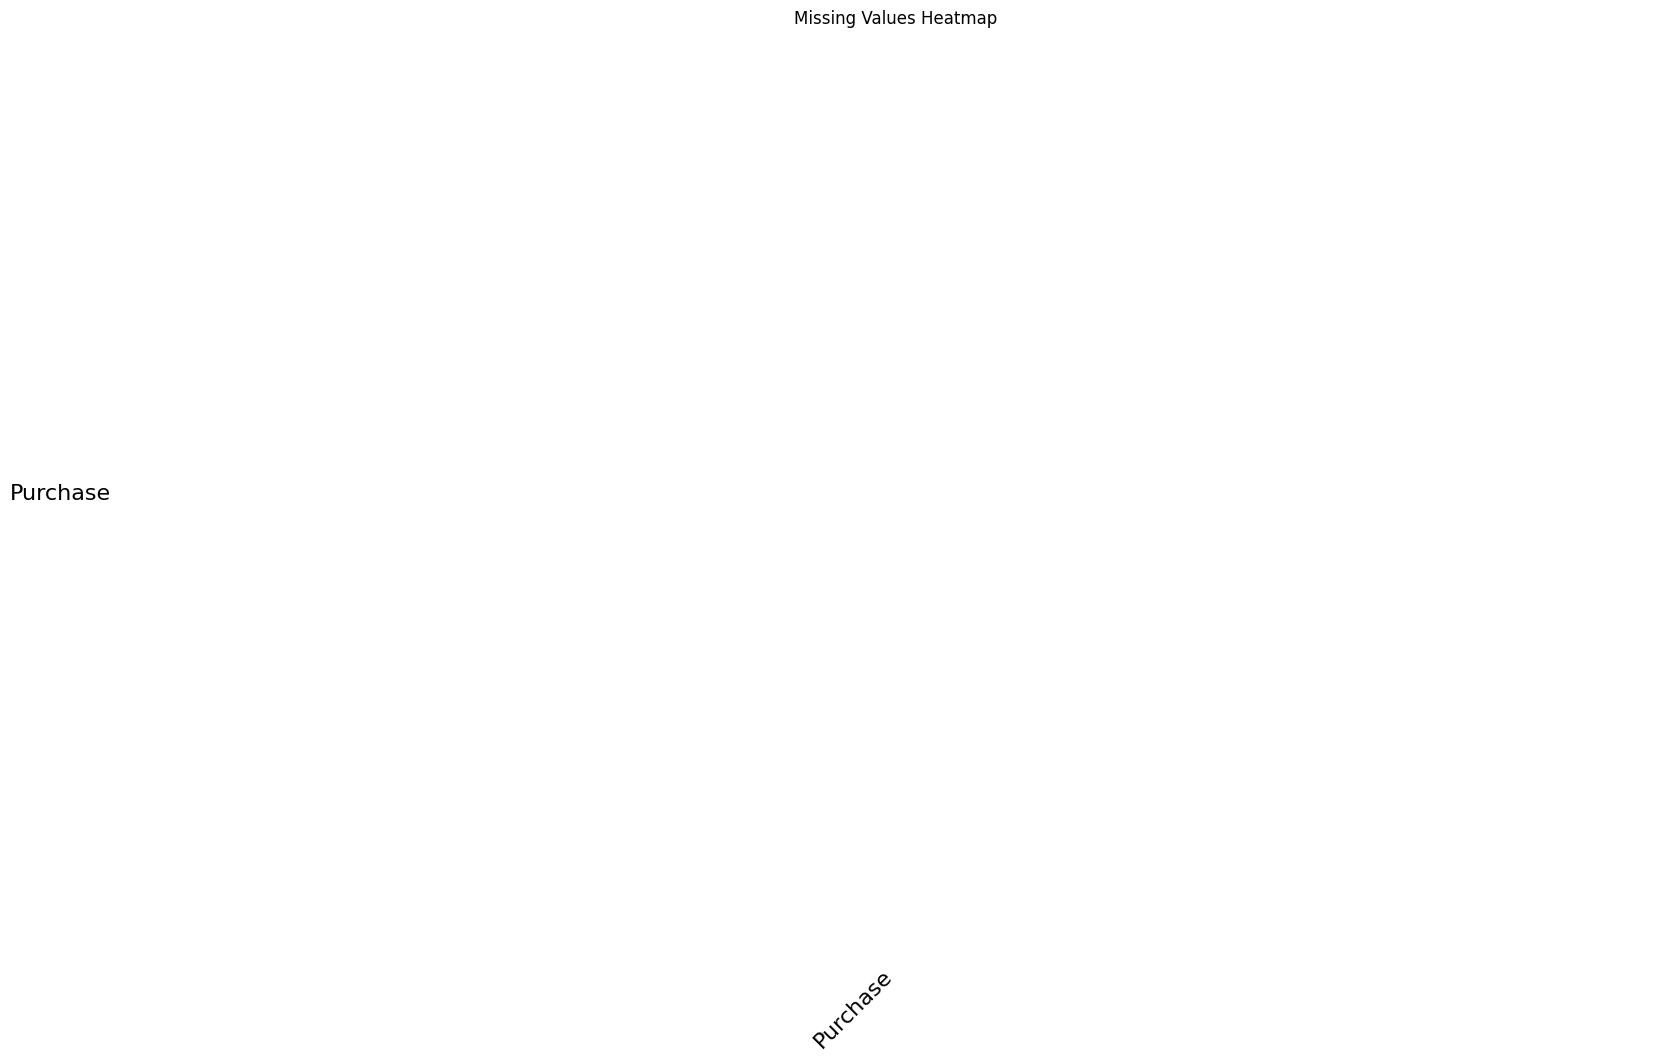

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0


In [43]:
# Check for missing values
import missingno as msno

# Visualize missing values
plt.figure(figsize=(10, 5))
msno.heatmap(df, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Impute or drop missing values (example: fill NaN with mode for categorical features)
df.fillna(df.mode().iloc[0], inplace=True)

# Verify after handling missing values
df.isnull().sum()


## **Replacing Deprecated .append() Method**

In [44]:
# Use pd.concat instead of .append()
df = pd.concat([df_train, df_test], ignore_index=True)

## **Visualizing Purchase Amount Distribution**

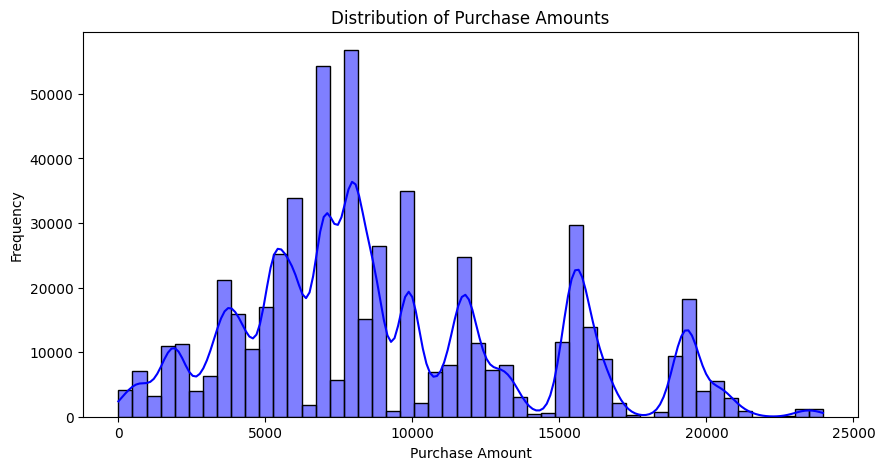

In [45]:
# Purchase Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase'], bins=50, kde=True, color='blue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


## **Customer Demographics Analysis**

<ipython-input-46-079376be6e2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')


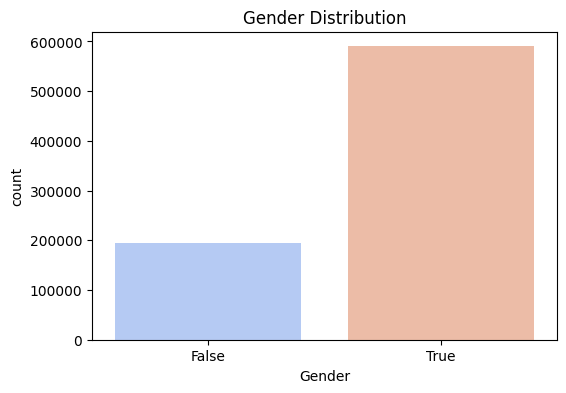

<ipython-input-46-079376be6e2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='viridis', order=df['Age'].value_counts().index)


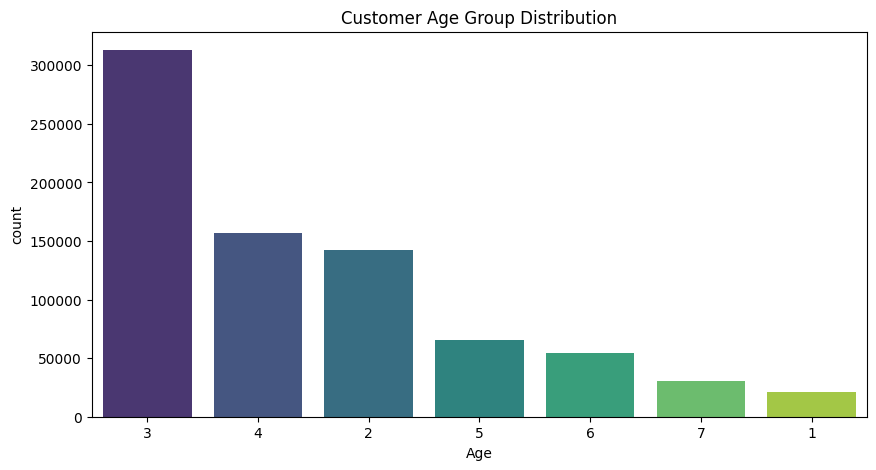

In [46]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

# Age Group Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Age', data=df, palette='viridis', order=df['Age'].value_counts().index)
plt.title('Customer Age Group Distribution')
plt.show()


## **Product Category Trends**

<ipython-input-47-82bcbd1eb0d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Product_Category_1'].value_counts().index[:10],


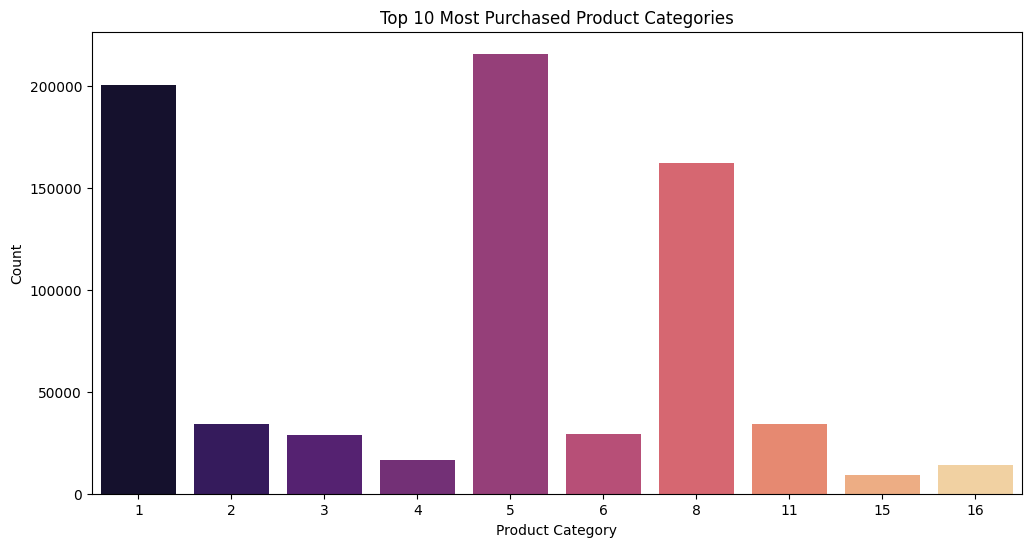

In [47]:
# Top 10 most purchased product categories
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Product_Category_1'].value_counts().index[:10],
            y=df['Product_Category_1'].value_counts().values[:10], palette='magma')
plt.title('Top 10 Most Purchased Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


## **Conclusions & Insights**

In [48]:
# Key insights from the analysis:
# 1. The majority of purchases come from a certain range of purchase values (check the histogram for trends).
# 2. Males dominate the Black Friday sales, but further segmentation can reveal patterns.
# 3. Age groups influence purchasing behaviors significantly.
# 4. Some product categories are more popular than others.
# 5. Further segmentation based on City_Category or Stay_In_Current_City_Years could yield more insights.
